In [1]:
import pandas as pd
import numpy as np

In [2]:
np.random.seed(42)


In [3]:
employee_ids = [f"EMP_{i:03d}"for i in range(1,31)]
dates = pd. date_range("2025-07-01",periods=30,freq ="D")

In [4]:
data = {
    "Date":np.tile(dates,len(employee_ids)),
    "Employee_ID":np.repeat(employee_ids,len(dates)),
    "Working_Hours":np.random.uniform(4,10,size=len(employee_ids)*len(dates)).round(2)
}


In [5]:
df = pd.DataFrame(data)

In [6]:
df.to_csv("employee_working_hours.csv", index=False)

In [7]:
df_csv = pd.read_csv("employee_working_hours.csv")

In [8]:
print(df_csv.head())
print(df_csv.describe())
print(df_csv["Employee_ID"].nunique())


         Date Employee_ID  Working_Hours
0  2025-07-01     EMP_001           6.25
1  2025-07-02     EMP_001           9.70
2  2025-07-03     EMP_001           8.39
3  2025-07-04     EMP_001           7.59
4  2025-07-05     EMP_001           4.94
       Working_Hours
count     900.000000
mean        6.954233
std         1.762088
min         4.030000
25%         5.387500
50%         7.010000
75%         8.490000
max        10.000000
30


In [10]:
total_hours = df_csv.groupby("Employee_ID")["Working_Hours"].sum().sort_values(ascending=False)
print(total_hours)


Employee_ID
EMP_009    228.84
EMP_018    226.10
EMP_017    225.95
EMP_014    224.92
EMP_027    220.85
EMP_025    214.07
EMP_026    212.33
EMP_016    211.56
EMP_007    210.91
EMP_010    210.88
EMP_008    210.81
EMP_011    210.77
EMP_028    209.51
EMP_019    209.42
EMP_002    209.37
EMP_004    208.46
EMP_013    207.72
EMP_003    206.79
EMP_015    206.67
EMP_024    204.46
EMP_006    204.29
EMP_023    203.64
EMP_005    202.07
EMP_022    200.73
EMP_020    199.91
EMP_029    199.89
EMP_001    198.96
EMP_012    196.52
EMP_021    192.18
EMP_030    190.23
Name: Working_Hours, dtype: float64


In [11]:
avg_daily = df_csv.groupby("Employee_ID")["Working_Hours"].mean()
print(avg_daily)

Employee_ID
EMP_001    6.632000
EMP_002    6.979000
EMP_003    6.893000
EMP_004    6.948667
EMP_005    6.735667
EMP_006    6.809667
EMP_007    7.030333
EMP_008    7.027000
EMP_009    7.628000
EMP_010    7.029333
EMP_011    7.025667
EMP_012    6.550667
EMP_013    6.924000
EMP_014    7.497333
EMP_015    6.889000
EMP_016    7.052000
EMP_017    7.531667
EMP_018    7.536667
EMP_019    6.980667
EMP_020    6.663667
EMP_021    6.406000
EMP_022    6.691000
EMP_023    6.788000
EMP_024    6.815333
EMP_025    7.135667
EMP_026    7.077667
EMP_027    7.361667
EMP_028    6.983667
EMP_029    6.663000
EMP_030    6.341000
Name: Working_Hours, dtype: float64


In [12]:
threshold_low = 5
threshold_high = 9
df_csv["Low_Hours_Flag"] = df_csv["Working_Hours"] < threshold_low
df_csv["High_Hours_Flag"] = df_csv["Working_Hours"] > threshold_high
print(df_csv[df_csv["Low_Hours_Flag"] | df_csv["High_Hours_Flag"]].head())

         Date Employee_ID  Working_Hours  Low_Hours_Flag  High_Hours_Flag
1  2025-07-02     EMP_001           9.70           False             True
4  2025-07-05     EMP_001           4.94            True            False
5  2025-07-06     EMP_001           4.94            True            False
6  2025-07-07     EMP_001           4.35            True            False
7  2025-07-08     EMP_001           9.20           False             True


/tmp/ipython-input-3697240918.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.index, y=top10.values, palette=sns.color_palette("rainbow", n_colors=10))


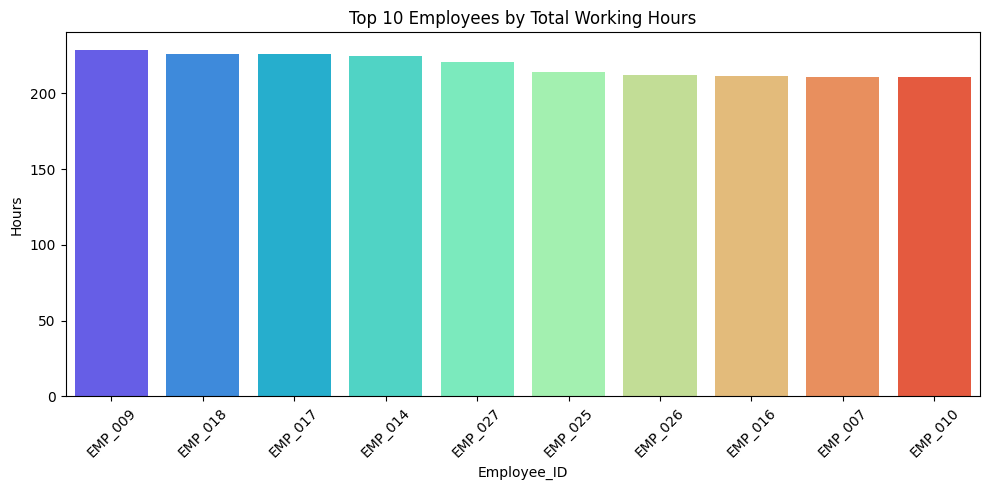

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

top10 = total_hours.head(10)

plt.figure(figsize=(10, 5))

# Use a rainbow color palette
sns.barplot(x=top10.index, y=top10.values, palette=sns.color_palette("rainbow", n_colors=10))

plt.xticks(rotation=45)
plt.title("Top 10 Employees by Total Working Hours")
plt.ylabel("Hours")
plt.tight_layout()
plt.show()

In [14]:
row = df_csv[df_csv["Employee_ID"].str.strip() == "EMP_001"]
print(row)

          Date Employee_ID  Working_Hours  Low_Hours_Flag  High_Hours_Flag
0   2025-07-01     EMP_001           6.25           False            False
1   2025-07-02     EMP_001           9.70           False             True
2   2025-07-03     EMP_001           8.39           False            False
3   2025-07-04     EMP_001           7.59           False            False
4   2025-07-05     EMP_001           4.94            True            False
5   2025-07-06     EMP_001           4.94            True            False
6   2025-07-07     EMP_001           4.35            True            False
7   2025-07-08     EMP_001           9.20           False             True
8   2025-07-09     EMP_001           7.61           False            False
9   2025-07-10     EMP_001           8.25           False            False
10  2025-07-11     EMP_001           4.12            True            False
11  2025-07-12     EMP_001           9.82           False             True
12  2025-07-13     EMP_00